### **HACKATHON**

In [1]:
import pandas as pd
import spacy
from spacy.lang.en import English
import re
!python -m spacy download en_core_web_md
nlp=spacy.load("en_core_web_md")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-10 06:00:45.465874: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 14.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
df1=open('/content/Review1.txt').read()
df2=open('/content/Review2.txt').read()
df3=open('/content/Review3.txt').read()

In [3]:
#pip install vaderSentiment

In [4]:
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#sentiment = SentimentIntensityAnalyzer()
#sent_1 = sentiment.polarity_scores(df1)
#sent_2 = sentiment.polarity_scores(df2)
#sent_3 = sentiment.polarity_scores(df3)
#print("Sentiment of text 1:", sent_1)
#print("Sentiment of text 2:", sent_2)
#print("Sentiment of text 3:", sent_3)

In [5]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


--> TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. 

In [6]:
from textblob import TextBlob
text1=TextBlob(df1)
text2=TextBlob(df2)
text3=TextBlob(df3)
print("TEXT 1 SENTIMENTS ==>",text1.sentiment)
print("TEXT 2 SENTIMENTS ==>",text2.sentiment)
print("TEXT 3 SENTIMENTS ==>",text3.sentiment)

TEXT 1 SENTIMENTS ==> Sentiment(polarity=0.15873942590775, subjectivity=0.5327530681850272)
TEXT 2 SENTIMENTS ==> Sentiment(polarity=0.15730820314412217, subjectivity=0.5231979023948427)
TEXT 3 SENTIMENTS ==> Sentiment(polarity=0.14401240846353666, subjectivity=0.5258260911344745)


In [7]:
dict = {'REVIEWS':['Review1','Review2','Review3'],'1/2star rating/Negative':[df1.count('__label__1'),df2.count('__label__1'),df3.count('__label__1')],'4/5star rating/Positive':[df1.count('__label__2'),df2.count('__label__2'),df3.count('__label__2')]}
ratings = pd.DataFrame(dict,index=('DF1','DF2','DF3'))
ratings['difference']=ratings['4/5star rating/Positive']-ratings['1/2star rating/Negative']
ratings

REVIEWS  1/2star rating/Negative  4/5star rating/Positive  difference
DF1  Review1                      485                      501          16
DF2  Review2                      443                      467          24
DF3  Review3                      489                      475         -14

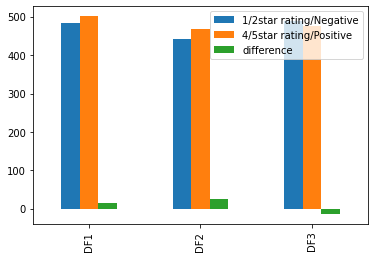

In [8]:
ratings.plot(kind='bar');

INTERPRETATION: AS DIFFERENCE BETWEEN POSITIVE AND NEGATIVE REVIEWS ARE 14 WHUCH IS LEAST. SO WE CAN SAY THAT REVIEW 3 IS LEAST BIASED.

In [9]:
type(df1)

str

In [10]:
df1 = df1.replace('__label__', '')
df1
df3 = df3.replace('__label__', '')
df3

'1 Missing over 80 pages...!: I have found that the entire "N" section and a good deal of the "M" section have not been included in this book, due to an obvious misprint! Beware, buyer!\n1 Movie Guide: The book is comprehensive. Very seldom you try to look up a picture or video which is not in the book. The reviews are sometimes too short, however, the book would be too unhandy if every picture had a bigger review. Also the facts about the different movies are accurate and helpful.\n2 Great Collection: Johnson Records stars were the Dubs and the Shells, but the other groups althoughnot as well known also give a good accounting of themselves.\n2 Good album, continuing the hits.: This is another good album from Switchfoot. Unfortunately in the omaha area, the song "oh! Gravity" has not been played on the stations I listen to, so this album snuck up on me for release. Its good, but I honestly like the last album Nothing is Sound a bit more, a little more rock edge. This album is solid, bu

---> THERE IS WORD 'LABEL' WHICH HAS HIGHEST COUNT SO WE HAVE REMOVED IT BECAUSE IT IS NOT ADDING VALUE TO THE DATA TO BE INTERPRETATE.

In [11]:
def clean(data):
    sen=re.sub("[^0-9a-zA-Z\-]+"," ",data)
    sen=re.sub("-(?!\w)|(?<!\w)-"," ",sen)                       
    sen=re.sub(r'\s\-\s','',sen)
    sen=re.sub('\d+','',sen)
    sen=re.sub(r"\b[a-zA-Z]\b", "", sen)
    sen=re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", sen)
    sen=re.sub(r'\\s+','',sen)
    sen=re.sub(r'\t','',sen)
    sen=sen.lower()
    sen= sen.strip()
    return sen

In [12]:
sen=re.compile(r'\W*\b\w{1,3}\b')
df1=sen.sub('',df1)

In [13]:
df1=clean(df1)
df1

'backup plan summer reading that does require much from reader found plot unbelievable would wait years they even kept touch friends romance predictable treatment ptsd from what described this story skimmed through good part this book just finished simply hold interest would work with verizon card tried these work with verizon pc card without success even after updating software ended buying linksyswireless router mobile broadband wrtgg which works well priced less linksys require software update from linksys website profound journey lumari book akashic records opened connect with greater wisdom immediately felt listening more intimate conversation with keepers akashic while some books explain access information from akashic lumari speaks about collective itself this could feel energies collective they perceive universe they gather information life felt like invited into akashic listen learn understand this book very interesting opens whole conversation that brought deeper meaning poss

In [14]:
toks=nlp(df1)

In [15]:
import nltk.tokenize
nltk.download('punkt')
tok3=nltk.tokenize.word_tokenize(df1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
import collections
count = collections.Counter(tok3)
for i in count.most_common(50):
     print(i)

('this', 1431)
('that', 796)
('book', 702)
('with', 606)
('have', 473)
('good', 350)
('great', 310)
('they', 295)
('like', 287)
('very', 280)
('just', 246)
('would', 245)
('from', 236)
('read', 229)
('about', 219)
('more', 214)
('what', 201)
('there', 193)
('will', 187)
('your', 175)
('when', 173)
('really', 166)
('time', 163)
('them', 155)
('some', 151)
('only', 149)
('much', 147)
('first', 147)
('well', 145)
('love', 143)
('other', 135)
('than', 134)
('product', 130)
('after', 129)
('these', 126)
('because', 118)
('work', 117)
('were', 117)
('been', 116)
('better', 110)
('little', 108)
('also', 107)
('could', 106)
('best', 106)
('even', 104)
('their', 103)
('movie', 102)
('which', 101)
('does', 99)
('make', 99)


In [17]:
spacy_st=nlp.Defaults.stop_words
fs=[]
sw=[]
for i in toks:
    if i.is_stop==False:
        fs.append(i)
    else:
        sw.append(i)  
print("ORIGINAL DATA ===> ",len(toks))
print("FILTERED DATA WITHOUT STOP WORDS ===> ",len(fs),fs)
print("STOP WORDS ARE ===> ",len(sw),sw)

ORIGINAL DATA ===>  43481
FILTERED DATA WITHOUT STOP WORDS ===>  30833 [backup, plan, summer, reading, require, reader, found, plot, unbelievable, wait, years, kept, touch, friends, romance, predictable, treatment, ptsd, described, story, skimmed, good, book, finished, simply, hold, interest, work, verizon, card, tried, work, verizon, pc, card, success, updating, software, ended, buying, linksyswireless, router, mobile, broadband, wrtgg, works, priced, linksys, require, software, update, linksys, website, profound, journey, lumari, book, akashic, records, opened, connect, greater, wisdom, immediately, felt, listening, intimate, conversation, keepers, akashic, books, explain, access, information, akashic, lumari, speaks, collective, feel, energies, collective, perceive, universe, gather, information, life, felt, like, invited, akashic, listen, learn, understand, book, interesting, opens, conversation, brought, deeper, meaning, possibility, awareness, energy, quality, book, excellent, me

In [18]:
sp=spacy_st

In [19]:
len(spacy_st)

326

In [20]:
print(sp)

{'ca', 'are', 'within', 'against', 'front', 'five', 'our', 'whether', 'move', 'least', 'became', 'did', 'this', 'others', 'perhaps', 'below', 'latter', 'could', 'sometime', 'must', 'beside', '‘d', 'nine', 'become', 'get', 'towards', 'i', 'of', 'from', 'latterly', 'whose', 'few', 'three', '‘ll', 'once', 'been', 'yourself', 'her', 'n‘t', 'also', 'eleven', 'enough', 'behind', 'doing', 'throughout', 'there', 'amongst', 'a', 'much', 'everywhere', 'if', 'for', 'otherwise', 'twenty', 'over', 'into', 'show', 'although', 'because', 'beforehand', 'during', 'empty', 'formerly', 'many', 'whereupon', 'after', 'somehow', 'fifteen', 'together', 'himself', 'every', 'between', 'via', 'who', 'third', 'anyway', 'four', 'therefore', 'part', 'would', '’re', 'may', 'you', 'whence', 'two', 'all', 'without', 'sixty', 'even', 'sometimes', 'beyond', 'everything', 'except', 'top', 'already', 're', 'alone', 'whom', 'out', 'name', 'those', 'though', 'herein', 'meanwhile', 'yourselves', 'ourselves', 'one', "n't", '

In [21]:
stopwords=nlp.Defaults.stop_words
stop_dict=stopwords
rm=['ingredients','live', 'person', 'went','came', 'gave', 'seen ','movie']
for i in rm:
    stop_dict.add(i)

In [22]:
len(stop_dict)

334

In [23]:
fs1=[]
sw1=[]
for j in fs:
    if j not in stop_dict:
        fs1.append(j)
    else:
        sw1.append(j)  
print("ORIGINAL DATA ===> ",len(fs))
print("FILTERED DATA WITHOUT STOP WORDS ===> ",len(fs1),fs1)
print("STOP WORDS ARE ===> ",len(sw1),sw1)

ORIGINAL DATA ===>  30833
FILTERED DATA WITHOUT STOP WORDS ===>  30833 [backup, plan, summer, reading, require, reader, found, plot, unbelievable, wait, years, kept, touch, friends, romance, predictable, treatment, ptsd, described, story, skimmed, good, book, finished, simply, hold, interest, work, verizon, card, tried, work, verizon, pc, card, success, updating, software, ended, buying, linksyswireless, router, mobile, broadband, wrtgg, works, priced, linksys, require, software, update, linksys, website, profound, journey, lumari, book, akashic, records, opened, connect, greater, wisdom, immediately, felt, listening, intimate, conversation, keepers, akashic, books, explain, access, information, akashic, lumari, speaks, collective, feel, energies, collective, perceive, universe, gather, information, life, felt, like, invited, akashic, listen, learn, understand, book, interesting, opens, conversation, brought, deeper, meaning, possibility, awareness, energy, quality, book, excellent, me

In [24]:
stri = ' '.join([str(elem) for elem in fs1])
def Convert(string):
    list1 = list(string.split(" "))
    return list1
print(Convert(stri))

['backup', 'plan', 'summer', 'reading', 'require', 'reader', 'found', 'plot', 'unbelievable', 'wait', 'years', 'kept', 'touch', 'friends', 'romance', 'predictable', 'treatment', 'ptsd', 'described', 'story', 'skimmed', 'good', 'book', 'finished', 'simply', 'hold', 'interest', 'work', 'verizon', 'card', 'tried', 'work', 'verizon', 'pc', 'card', 'success', 'updating', 'software', 'ended', 'buying', 'linksyswireless', 'router', 'mobile', 'broadband', 'wrtgg', 'works', 'priced', 'linksys', 'require', 'software', 'update', 'linksys', 'website', 'profound', 'journey', 'lumari', 'book', 'akashic', 'records', 'opened', 'connect', 'greater', 'wisdom', 'immediately', 'felt', 'listening', 'intimate', 'conversation', 'keepers', 'akashic', 'books', 'explain', 'access', 'information', 'akashic', 'lumari', 'speaks', 'collective', 'feel', 'energies', 'collective', 'perceive', 'universe', 'gather', 'information', 'life', 'felt', 'like', 'invited', 'akashic', 'listen', 'learn', 'understand', 'book', 'in

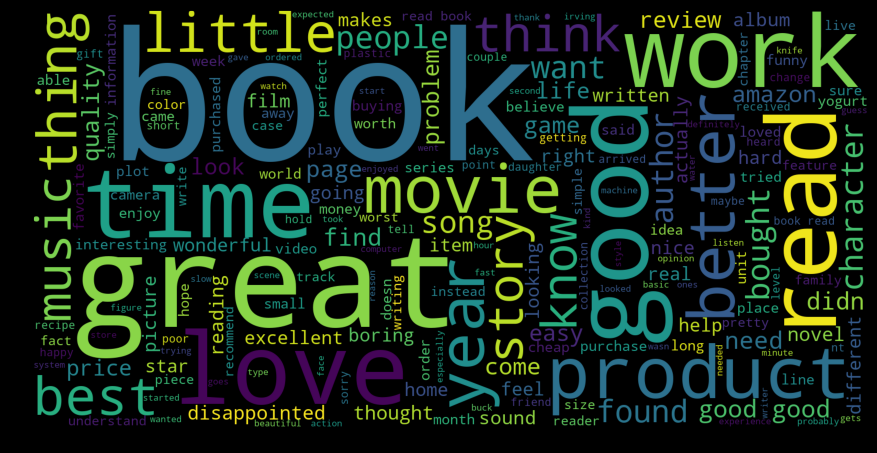

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(stri)
plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)

### LEMMATIZATION

In [27]:
str1 = ' '.join([str(elem) for elem in fs1])

In [28]:
doc=nlp(str1)
print(type(doc))
for i in doc:
    print("LEMMATIZATION OF ",i,'==>',i.lemma_)

Streaming output truncated to the last 5000 lines.
LEMMATIZATION OF  steer ==> steer
LEMMATIZATION OF  good ==> good
LEMMATIZATION OF  opening ==> open
LEMMATIZATION OF  trite ==> trite
LEMMATIZATION OF  story ==> story
LEMMATIZATION OF  unlikeable ==> unlikeable
LEMMATIZATION OF  writer ==> writer
LEMMATIZATION OF  purient ==> purient
LEMMATIZATION OF  interest ==> interest
LEMMATIZATION OF  prostitutes ==> prostitute
LEMMATIZATION OF  guess ==> guess
LEMMATIZATION OF  book ==> book
LEMMATIZATION OF  helped ==> help
LEMMATIZATION OF  irving ==> irve
LEMMATIZATION OF  explain ==> explain
LEMMATIZATION OF  wife ==> wife
LEMMATIZATION OF  needed ==> need
LEMMATIZATION OF  hang ==> hang
LEMMATIZATION OF  amsterdam ==> amsterdam
LEMMATIZATION OF  light ==> light
LEMMATIZATION OF  district ==> district
LEMMATIZATION OF  irvings ==> irving
LEMMATIZATION OF  best ==> good
LEMMATIZATION OF  john ==> john
LEMMATIZATION OF  irving ==> irving
LEMMATIZATION OF  continually ==> continually
LEMMATIZ

### POS(TAGGING)

In [29]:
for w in doc:
     print("word is==> ",w.text,"     pos is ==> ",w.pos_,"     tag is==> ",w.tag_)

Streaming output truncated to the last 5000 lines.
word is==>  steer      pos is ==>  VERB      tag is==>  VB
word is==>  good      pos is ==>  ADJ      tag is==>  JJ
word is==>  opening      pos is ==>  VERB      tag is==>  VBG
word is==>  trite      pos is ==>  ADJ      tag is==>  JJ
word is==>  story      pos is ==>  NOUN      tag is==>  NN
word is==>  unlikeable      pos is ==>  ADJ      tag is==>  JJ
word is==>  writer      pos is ==>  NOUN      tag is==>  NN
word is==>  purient      pos is ==>  ADJ      tag is==>  JJ
word is==>  interest      pos is ==>  NOUN      tag is==>  NN
word is==>  prostitutes      pos is ==>  NOUN      tag is==>  NNS
word is==>  guess      pos is ==>  VERB      tag is==>  VBP
word is==>  book      pos is ==>  NOUN      tag is==>  NN
word is==>  helped      pos is ==>  VERB      tag is==>  VBD
word is==>  irving      pos is ==>  VERB      tag is==>  VBG
word is==>  explain      pos is ==>  VERB      tag is==>  VB
word is==>  wife      pos is ==>  NOUN    

In [30]:
ADJ=[]
for w in doc:
    if w.pos_=='ADJ':
        ADJ.append(w)
print("ADJECTIVES ARE ===>  ",ADJ)

ADJECTIVES ARE ===>   [unbelievable, predictable, good, verizon, mobile, profound, greater, intimate, akashic, akashic, collective, collective, perceive, interesting, deeper, excellent, profound, greater, soluble, soluble, little, good, softer, marvel, amazing, literate, masterful, ouvre, strange, fantastic, marvel, early, seventeenth, afraid, comic, mechanical, usual, marvel, better, graphic, marvel, historic, wonderful, familiar, casual, comic, good, excellent, worth, difficult, best, normal, marvel, incredible, current, comic, stiff, little, petking, petking, favorite, awesome, cool, better, afraid, bcuz, straight, funniest, crazy, cool, thier, mich, reichst, awesome, sound, rammstein, better, good, good, portuguese, colonialism, ethnolinguistic, whimsical, great, unfair, objective, similar, tragic, italian, coastal, beautiful, fundamentalist, christian, accurate, missionary, ugly, comfortable, cute, ugly, entire, good, good, good, good, good, good, good, good, good, good, good, goo

### VECTORISATION:

In [31]:
type(doc)
str2 = ' '.join([str(elem) for elem in doc])

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
vector=CountVectorizer()
fit=vector.fit_transform([str2])
df_bow=pd.DataFrame(fit.toarray(),columns=vector.get_feature_names(),index=['COUNT'])
df_bow=df_bow.transpose()
df_bow.sort_values(by=['COUNT'],ascending=False).head(40)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


COUNT
book            702
good            350
great           310
like            287
read            229
time            163
love            143
product         130
work            117
better          110
little          108
best            106
movie           102
quality          94
music            91
story            89
found            85
reading          85
think            85
bought           84
people           84
books            83
know             82
money            82
want             76
recommend        75
didn             73
author           70
find             69
easy             69
amazon           67
years            65
thing            62
characters       62
works            62
life             60
thought          57
disappointed     57
written          55
price            55

In [33]:
print(df_bow.shape)

(8150, 1)


INTERPRETATION:COUNT FOR POSITIVE REVIEWS(ASSUMED) i.e., GOOD,BETTER,LOVE,LIKE,BEST,LOVE,GREAT ETC.. ARE HAVING HIGHEST COUNT, WHICH MAY MEAN THAT MOST OF THE REVIEWS ARE POSTIVE.

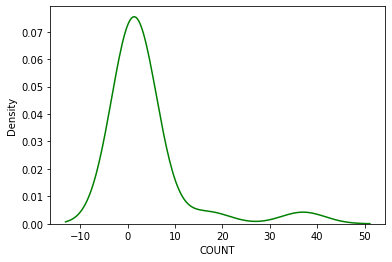

In [34]:
import seaborn as sns
sns.kdeplot(df_bow['COUNT'].head(20),color='g')

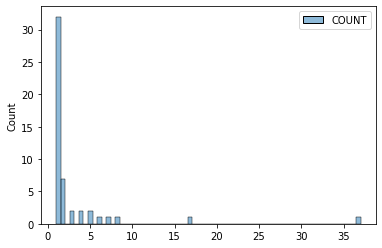

In [35]:
sns.histplot(df_bow.head(50))

In [36]:
dff=df_bow[df_bow['COUNT']>40]
dff.shape

(75, 1)

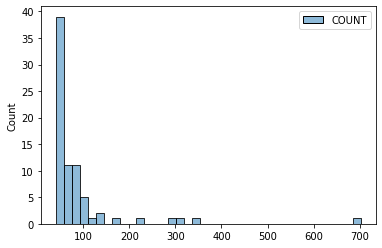

In [37]:
sns.histplot(dff)

INTERPRETATION: DISTRIBUTION IS MUCH MORE LIKELY TOWARDS 0-150 WHERE MOST COUNT OF WORD IS LYING.

### WV

In [38]:
doc = nlp(str2)           
for token in doc:
    print('Vector Length===> \n',token.vector.shape)                       
    print('Word Vector Representation===> \n',token.vector)                

Streaming output truncated to the last 5000 lines.
  1.1362   -3.8091    1.9956    1.808    -0.62927  -2.4552   -0.65942
  0.61702   0.99222  -3.4097   -2.485     0.91722   0.53026   0.29422
  2.6657    0.78068   1.6717   -0.50454  -0.76952   1.4947    1.664
 -1.7403    0.75233  -0.30192  -1.0671   -1.8293    5.1479   -3.474
 -3.3772   -1.388    -3.6695   -0.27826   0.44092   1.1023   -7.0678
 -0.13035   2.163     1.5899   -0.056653 -1.1125    2.9423    1.225
 -1.933    -1.9747   -0.98627  -2.1681   -1.7335   -0.99403   4.3725
 -2.1993   -1.896     0.11544  -0.6616    1.7869   -2.5392    2.9265
 -2.2511    3.0999    1.8407    4.8949    0.76453  -1.2849   -2.0143
 -4.7149   -0.46113   0.24683  -0.59664   2.0882   -0.72402  -0.19909
  1.3673    5.3085   -1.2983   -0.63074  -0.30184   1.3688    0.76047
 -1.1883   -2.2365    1.5376    1.4429    0.7196   -0.48454  -1.9804
 -3.2955    2.8376   -1.392     3.1301   -1.3487   -2.0634    1.4391
 -5.7794   -3.202     1.4474   -0.69404   2.0828   

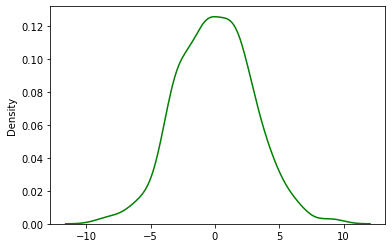

In [39]:
sns.kdeplot(token.vector,color='g')

INTERPRETATION: HERE WE CAN SEE DATA IS NORMALLY DISTRIBUTED.

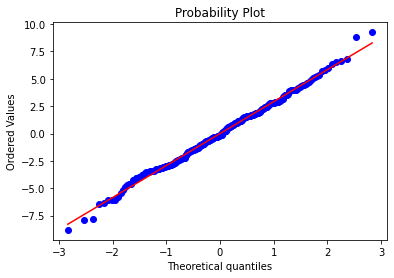

In [40]:
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt 
stats.probplot(token.vector, plot=plt);

INTERPRETATION: PROBPLOT CALCULATES A BEST FIT-LINE FOR THE DATA.

### SIMMILARITY

In [41]:
c=0
for token1 in doc:                                                     
    for token2 in doc:                                                  
        print("   TOKEN 1 == ",token1.text,"   TOKEN 2 == ", token2.text,"   SIMMILARITY == ", token1.similarity(token2)) 
        break
        c+=1
        c=20     

   TOKEN 1 ==  backup    TOKEN 2 ==  backup    SIMMILARITY ==  1.0
   TOKEN 1 ==  plan    TOKEN 2 ==  backup    SIMMILARITY ==  0.2703076899051666
   TOKEN 1 ==  summer    TOKEN 2 ==  backup    SIMMILARITY ==  0.13904023170471191
   TOKEN 1 ==  reading    TOKEN 2 ==  backup    SIMMILARITY ==  0.1549968272447586
   TOKEN 1 ==  require    TOKEN 2 ==  backup    SIMMILARITY ==  0.28730508685112
   TOKEN 1 ==  reader    TOKEN 2 ==  backup    SIMMILARITY ==  0.15251564979553223
   TOKEN 1 ==  found    TOKEN 2 ==  backup    SIMMILARITY ==  0.08959537744522095
   TOKEN 1 ==  plot    TOKEN 2 ==  backup    SIMMILARITY ==  0.05793313682079315
   TOKEN 1 ==  unbelievable    TOKEN 2 ==  backup    SIMMILARITY ==  0.17764812707901
   TOKEN 1 ==  wait    TOKEN 2 ==  backup    SIMMILARITY ==  0.22692398726940155
   TOKEN 1 ==  years    TOKEN 2 ==  backup    SIMMILARITY ==  0.08404731005430222
   TOKEN 1 ==  kept    TOKEN 2 ==  backup    SIMMILARITY ==  0.1611221581697464
   TOKEN 1 ==  touch    TOKEN 2

<ipython-input-41-2f561f5ce86b>:4: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  print("   TOKEN 1 == ",token1.text,"   TOKEN 2 == ", token2.text,"   SIMMILARITY == ", token1.similarity(token2))


Streaming output truncated to the last 5000 lines.
   TOKEN 1 ==  steer    TOKEN 2 ==  backup    SIMMILARITY ==  0.1679231822490692
   TOKEN 1 ==  good    TOKEN 2 ==  backup    SIMMILARITY ==  0.21495746076107025
   TOKEN 1 ==  opening    TOKEN 2 ==  backup    SIMMILARITY ==  0.2561388909816742
   TOKEN 1 ==  trite    TOKEN 2 ==  backup    SIMMILARITY ==  -0.036215394735336304
   TOKEN 1 ==  story    TOKEN 2 ==  backup    SIMMILARITY ==  0.05642705410718918
   TOKEN 1 ==  unlikeable    TOKEN 2 ==  backup    SIMMILARITY ==  0.23571082949638367
   TOKEN 1 ==  writer    TOKEN 2 ==  backup    SIMMILARITY ==  0.02135460264980793
   TOKEN 1 ==  purient    TOKEN 2 ==  backup    SIMMILARITY ==  0.0
   TOKEN 1 ==  interest    TOKEN 2 ==  backup    SIMMILARITY ==  0.17375464737415314
   TOKEN 1 ==  prostitutes    TOKEN 2 ==  backup    SIMMILARITY ==  -0.015133745037019253
   TOKEN 1 ==  guess    TOKEN 2 ==  backup    SIMMILARITY ==  0.20203897356987
   TOKEN 1 ==  book    TOKEN 2 ==  backup    S

FOR DF3/REVIEW 3 USING NLTK

In [42]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
sen1=re.compile(r'\W*\b\w{1,3}\b')
df3=sen.sub('',df3)

In [44]:
df3=clean(df3)

In [45]:
def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)

In [46]:
dd=remove_Stopwords(df3)

In [47]:
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

In [48]:
nltk.download('omw-1.4')
dd=lemmatize_text(dd)
dd

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


'missing page found entire section good deal section included book obvious misprint beware buyer movie guide book comprehensive seldom look picture video book review sometimes short however book would unhandy every picture bigger review also fact different movie accurate helpful great collection johnson record star dub shell group althoughnot well known also give good accounting good album continuing hit another good album switchfoot unfortunately omaha area song gravity played station listen album snuck release good honestly like last album nothing sound little rock edge album solid nothing seems groundbreaking although good continuation sound much poppy feel book play single album like dare move meant live star still great album available major electric discount store bonus track bonus download great gaming working accesorie newer wrong movement smooth side diffent tipe people side find comfortable recommend mouse every wake amazon need correction people album error itemhas corrected

In [49]:
tok4=nltk.tokenize.word_tokenize(dd)

In [50]:
str1 = ' '.join([str(elem) for elem in tok4])
def Convert(string):
    list1 = list(string.split(" "))
    return list1
print(Convert(str1))

['missing', 'page', 'found', 'entire', 'section', 'good', 'deal', 'section', 'included', 'book', 'obvious', 'misprint', 'beware', 'buyer', 'movie', 'guide', 'book', 'comprehensive', 'seldom', 'look', 'picture', 'video', 'book', 'review', 'sometimes', 'short', 'however', 'book', 'would', 'unhandy', 'every', 'picture', 'bigger', 'review', 'also', 'fact', 'different', 'movie', 'accurate', 'helpful', 'great', 'collection', 'johnson', 'record', 'star', 'dub', 'shell', 'group', 'althoughnot', 'well', 'known', 'also', 'give', 'good', 'accounting', 'good', 'album', 'continuing', 'hit', 'another', 'good', 'album', 'switchfoot', 'unfortunately', 'omaha', 'area', 'song', 'gravity', 'played', 'station', 'listen', 'album', 'snuck', 'release', 'good', 'honestly', 'like', 'last', 'album', 'nothing', 'sound', 'little', 'rock', 'edge', 'album', 'solid', 'nothing', 'seems', 'groundbreaking', 'although', 'good', 'continuation', 'sound', 'much', 'poppy', 'feel', 'book', 'play', 'single', 'album', 'like', 

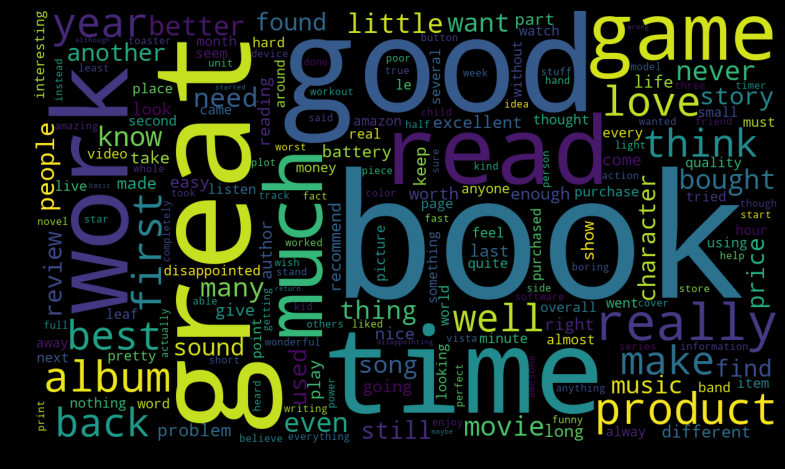

In [51]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black",width=1200, height=700).generate(str1)
plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)


INTERPRETATION: FROM BOTH THE REVIEWS REVIEW 1 & REVIEW 3 WE CAN SEE THAT THERE ARE MORE COUNT FOR POSITIVE WORDS THAN THE BAD/NEGATIVE WORDS. SO IT CAN BE INTERPRETATE THAT THERE MAYBE MORE POSTIVE REVIEWS THAN NEGATIVE.ALSO NOW DATA IS READY FOR MACHINE LEARNING ALGORITHM.